# WeatherPy

OBSERVATIONS (from 8/11/19 evening run):

Observations and plot titles will need to be updated with each API call/code run.

Five hundred eighty two cities were randomly generated by the API calls to produce this dataset on the 8/11/19 evening run. Some of the key observable trends are noted below.

Of the four weather conditions (maximum temperature, humidity, cloudiness, & wind speed) in this sample, maximum temperature & cloudiness are signaling a near-normal distribution with skewness between -0.5 & +0.5 when all the datapoints are considered. From the 

Every city in the dataset has a positive maximum temperature. However, if someone wanted to cool off on 8/11/19, Argentina might have been the place to be with three of the four coldest cities (Rio Gallagos, Mar del Plata, & Ushuaia) 32 degrees Fahrenheit or below.

Although in very different geographies, Ahipara, New Zealand & Bandarbelya, Somalia have kite flying wind speeds above 30 mph.

In [45]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [46]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
cities

['bambous virieux',
 'sao filipe',
 'chuy',
 'port-gentil',
 'bentiu',
 'irece',
 'lipari',
 'lavrentiya',
 'kahului',
 'isangel',
 'san patricio',
 'ushuaia',
 'hobart',
 'ketchikan',
 'busselton',
 'port alfred',
 'vega de alatorre',
 'morondava',
 'pierre',
 'hermanus',
 'kamenskoye',
 'port elizabeth',
 'gamba',
 'buluang',
 'chaoyang',
 'new norfolk',
 'punta arenas',
 'carutapera',
 'vao',
 'cherskiy',
 'namatanai',
 'hilo',
 'ternate',
 'pandamatenga',
 'ngunguru',
 'kapaa',
 'saint-philippe',
 'guerrero negro',
 'bilma',
 'thompson',
 'chunoyar',
 'puerto ayora',
 'albany',
 'yellowknife',
 'mataura',
 'esperance',
 'sitka',
 'anadyr',
 'half moon bay',
 'angra dos reis',
 'kyshtovka',
 'barentsburg',
 'pitimbu',
 'taolanaro',
 'san cristobal',
 'ancud',
 'geraldton',
 'atuona',
 'san quintin',
 'mys shmidta',
 'tuatapere',
 'victoria',
 'bluff',
 'mar del plata',
 'amla',
 'dikson',
 'northam',
 'arraial do cabo',
 'cape town',
 'sambava',
 'amderma',
 'vaini',
 'saskylakh',
 

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Print a log of each city as it's being processed (city number and city name).


In [47]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"

# Build query URL
query_url = url + "appid=" + api_key  + '&units=imperial' + "&q=" 

# Create Empty Lists to Receive Responses
Humidity = []
Cloudiness = []
Wind_Speed = []
Max_Temp = []
Country = []
Lat = []
Lng = []
Date = []

In [48]:
for city in cities:
    print(city)
    break

bambous virieux


In [49]:
response = requests.get(query_url + city).json()
response

{'coord': {'lon': 57.76, 'lat': -20.34},
 'weather': [{'id': 520,
   'main': 'Rain',
   'description': 'light intensity shower rain',
   'icon': '09n'}],
 'base': 'stations',
 'main': {'temp': 70.68,
  'pressure': 1023,
  'humidity': 78,
  'temp_min': 70,
  'temp_max': 71.6},
 'visibility': 5000,
 'wind': {'speed': 19.46, 'deg': 110, 'gust': 15.4},
 'clouds': {'all': 75},
 'dt': 1565573623,
 'sys': {'type': 1,
  'id': 2061,
  'message': 0.0106,
  'country': 'MU',
  'sunrise': 1565577207,
  'sunset': 1565618093},
 'timezone': 14400,
 'id': 1106677,
 'name': 'Bambous Virieux',
 'cod': 200}

In [50]:
# Create columns to house info
weather_df = pd.DataFrame({})
weather_df['City'] = ""
weather_df['Cloudiness'] = ""
weather_df['County'] = ""
weather_df['Date'] = ""
weather_df['Humidity'] = ""
weather_df['Lat'] = ""
weather_df['Lng'] = ""
weather_df['Max Temp'] = ""
weather_df['Wind Speed'] = ""
    
# Create a counter 
index = 0
    
# Loop through the cities creating a request for each city appending the empty lists
for city in cities:
    index = index + 1
    print(f"Processing Record {index} of Set 1 | {city}")
    response = requests.get(query_url + city).json()

# Store data in df
    try:        
        weather_df.loc[index, 'City'] = response['name']
        weather_df.loc[index, 'Cloudiness'] = (response['clouds']['all'])
        weather_df.loc[index, 'County'] = (response['sys']['country'])
        weather_df.loc[index, 'Date'] = (response['dt'])
        weather_df.loc[index, 'Humidity'] = (response['main']['humidity'])
        weather_df.loc[index, 'Lat'] = (response['coord']['lat'])
        weather_df.loc[index, 'Lng'] = (response['coord']['lon']) 
        weather_df.loc[index, 'Max Temp'] = (response['main']['temp_max'])
        weather_df.loc[index, 'Wind Speed'] = (response['wind']['speed'])      
        
    except (KeyError, IndexError):
        print("City not found. Skipping...")
    
print("---------------------------------")
print("Data Retrieval Complete")
print("---------------------------------")     


Processing Record 1 of Set 1 | bambous virieux
Processing Record 2 of Set 1 | sao filipe
Processing Record 3 of Set 1 | chuy
Processing Record 4 of Set 1 | port-gentil
Processing Record 5 of Set 1 | bentiu
City not found. Skipping...
Processing Record 6 of Set 1 | irece
Processing Record 7 of Set 1 | lipari
Processing Record 8 of Set 1 | lavrentiya
Processing Record 9 of Set 1 | kahului
Processing Record 10 of Set 1 | isangel
Processing Record 11 of Set 1 | san patricio
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | ketchikan
Processing Record 15 of Set 1 | busselton
Processing Record 16 of Set 1 | port alfred
Processing Record 17 of Set 1 | vega de alatorre
Processing Record 18 of Set 1 | morondava
Processing Record 19 of Set 1 | pierre
Processing Record 20 of Set 1 | hermanus
Processing Record 21 of Set 1 | kamenskoye
City not found. Skipping...
Processing Record 22 of Set 1 | port elizabeth
Processing Record 23 of Set 1

Processing Record 183 of Set 1 | salalah
Processing Record 184 of Set 1 | margate
Processing Record 185 of Set 1 | karamea
City not found. Skipping...
Processing Record 186 of Set 1 | ostrowiec swietokrzyski
Processing Record 187 of Set 1 | talnakh
Processing Record 188 of Set 1 | north myrtle beach
Processing Record 189 of Set 1 | mao
Processing Record 190 of Set 1 | caravelas
Processing Record 191 of Set 1 | longyearbyen
Processing Record 192 of Set 1 | nieves
Processing Record 193 of Set 1 | tabiauea
City not found. Skipping...
Processing Record 194 of Set 1 | maragogi
Processing Record 195 of Set 1 | kavieng
Processing Record 196 of Set 1 | bethel
Processing Record 197 of Set 1 | georgetown
Processing Record 198 of Set 1 | samalaeulu
City not found. Skipping...
Processing Record 199 of Set 1 | tawkar
City not found. Skipping...
Processing Record 200 of Set 1 | santa maria
Processing Record 201 of Set 1 | yandoon
City not found. Skipping...
Processing Record 202 of Set 1 | padang
Pr

Processing Record 364 of Set 1 | adrar
Processing Record 365 of Set 1 | puerto carreno
Processing Record 366 of Set 1 | mount isa
Processing Record 367 of Set 1 | meyungs
City not found. Skipping...
Processing Record 368 of Set 1 | puerto el triunfo
Processing Record 369 of Set 1 | yurgamysh
Processing Record 370 of Set 1 | mangrol
Processing Record 371 of Set 1 | veraval
Processing Record 372 of Set 1 | vammala
Processing Record 373 of Set 1 | velikiy ustyug
Processing Record 374 of Set 1 | luderitz
Processing Record 375 of Set 1 | diffa
Processing Record 376 of Set 1 | port hardy
Processing Record 377 of Set 1 | ixtapa
Processing Record 378 of Set 1 | grand-santi
Processing Record 379 of Set 1 | pampa
Processing Record 380 of Set 1 | solovetskiy
City not found. Skipping...
Processing Record 381 of Set 1 | erzin
Processing Record 382 of Set 1 | wanaka
Processing Record 383 of Set 1 | marawi
Processing Record 384 of Set 1 | ierapetra
Processing Record 385 of Set 1 | aksarka
Processing 

Processing Record 549 of Set 1 | jeremoabo
Processing Record 550 of Set 1 | orocue
Processing Record 551 of Set 1 | merauke
Processing Record 552 of Set 1 | boende
Processing Record 553 of Set 1 | wuda
Processing Record 554 of Set 1 | bom jesus
Processing Record 555 of Set 1 | christchurch
Processing Record 556 of Set 1 | quang ngai
Processing Record 557 of Set 1 | isoka
Processing Record 558 of Set 1 | alice springs
Processing Record 559 of Set 1 | bestobe
Processing Record 560 of Set 1 | makaha
Processing Record 561 of Set 1 | cidreira
Processing Record 562 of Set 1 | kieta
Processing Record 563 of Set 1 | ojinaga
Processing Record 564 of Set 1 | meadow lake
Processing Record 565 of Set 1 | cotonou
Processing Record 566 of Set 1 | ergani
Processing Record 567 of Set 1 | luganville
Processing Record 568 of Set 1 | bijni
Processing Record 569 of Set 1 | bara
Processing Record 570 of Set 1 | peravurani
Processing Record 571 of Set 1 | calvinia
Processing Record 572 of Set 1 | waipawa
Pr

In [51]:
weather_df.head()

,City,Cloudiness,County,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
1,Bambous Virieux,75,MU,1565573623,78,-20.34,57.76,71.6,19.46
2,Sao Filipe,0,CV,1565573623,86,14.9,-24.5,75.4,17.74
3,Chuy,39,UY,1565573623,93,-33.69,-53.46,49.84,7.18
4,Port-Gentil,91,GA,1565573624,80,-0.72,8.78,74.32,10.04
6,Irece,3,BR,1565573624,91,-11.3,-41.86,63.15,9.57


### Convert Raw Data to DataFrame and Export as .csv

In [52]:
# Convert the object data types for use in the charts
weather_df = weather_df.infer_objects()
weather_df.dtypes

# Export the city data into a .csv
weather_df.to_csv('Weather City Dataframe', sep='\t')


### Plot the Data

#### Latitude vs. Temperature Plot

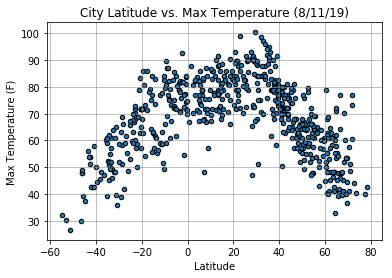

<Figure size 432x288 with 0 Axes>

In [53]:
# Create the scatter plot
weather_df.plot.scatter(x="Lat", y="Max Temp", edgecolors = 'black')
                      
# Incorporate the other graph properties 
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temperature (8/11/19)")
plt.grid(linestyle = "-", linewidth = "0.5", color = "gray")

plt.show()

# Save Figure
plt.savefig('Temperature')

#### Latitude vs. Humidity Plot

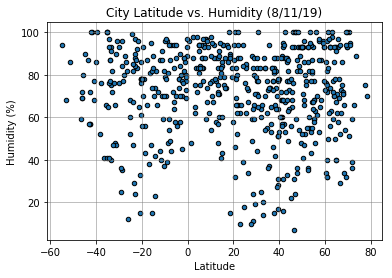

<Figure size 432x288 with 0 Axes>

In [54]:
# Create the scatter plot
weather_df.plot.scatter(x="Lat", y="Humidity", edgecolors = 'black')
                      
# Incorporate the other graph properties 
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (8/11/19)")
plt.grid(linestyle = "-", linewidth = "0.5", color = "gray")

plt.show()

# Save Figure
plt.savefig('Humidity')

#### Latitude vs. Cloudiness Plot

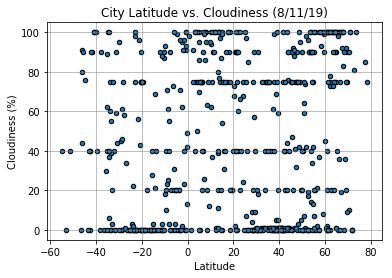

<Figure size 432x288 with 0 Axes>

In [55]:
# Create the scatter plot
weather_df.plot.scatter(x="Lat", y="Cloudiness", edgecolors = 'black')
                      
# Incorporate the other graph properties 
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (8/11/19)")
plt.grid(linestyle = "-", linewidth = "0.5", color = "gray")

plt.show()

# Save Figure
plt.savefig('Cloudiness')

#### Latitude vs. Wind Speed Plot

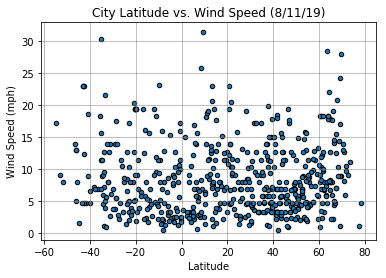

<Figure size 432x288 with 0 Axes>

In [56]:
# Create the scatter plot
weather_df.plot.scatter(x="Lat", y="Wind Speed", edgecolors = 'black')
                      
# Incorporate the other graph properties 
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed (8/11/19)")
plt.grid(linestyle = "-", linewidth = "0.5", color = "gray")

plt.show()

# Save Figure
plt.savefig('Wind Speed')

### Gather Summary Statistics

In [57]:
weather_df.describe(include='all')


,City,Cloudiness,County,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
count,582,582.000000,582,5.820000e+02,582.000000,582.000000,582.000000,582.000000,582.000000
unique,582,NaN,113,NaN,NaN,NaN,NaN,NaN,NaN
top,Longyearbyen,NaN,RU,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,65,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,44.178694,NaN,1.565574e+09,71.908935,20.792835,13.342440,68.379759,8.430275
std,NaN,39.733350,NaN,6.332725e+01,20.631517,32.787184,88.859424,14.217526,5.487489
min,NaN,0.000000,NaN,1.565573e+09,7.000000,-54.810000,-173.230000,26.600000,0.540000
25%,NaN,1.000000,NaN,1.565574e+09,60.000000,-5.800000,-69.375000,58.650000,4.470000
50%,NaN,40.000000,NaN,1.565574e+09,76.000000,25.270000,19.910000,70.170000,6.930000
75%,NaN,88.750000,NaN,1.565574e+09,88.000000,48.300000,88.325000,79.305000,11.410000


In [58]:
weather_df.describe()

,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
count,582.000000,5.820000e+02,582.000000,582.000000,582.000000,582.000000,582.000000
mean,44.178694,1.565574e+09,71.908935,20.792835,13.342440,68.379759,8.430275
std,39.733350,6.332725e+01,20.631517,32.787184,88.859424,14.217526,5.487489
min,0.000000,1.565573e+09,7.000000,-54.810000,-173.230000,26.600000,0.540000
25%,1.000000,1.565574e+09,60.000000,-5.800000,-69.375000,58.650000,4.470000
50%,40.000000,1.565574e+09,76.000000,25.270000,19.910000,70.170000,6.930000
75%,88.750000,1.565574e+09,88.000000,48.300000,88.325000,79.305000,11.410000
max,100.000000,1.565574e+09,100.000000,78.220000,178.420000,100.400000,31.360000


In [59]:
weather_df.skew()

Cloudiness    0.159325
Date         -2.193081
Humidity     -0.886694
Lat          -0.314638
Lng          -0.033481
Max Temp     -0.344106
Wind Speed    1.062329
dtype: float64

In [69]:
weather_df.sort_values(by=['Max Temp'], ascending=False)
weather_df.head()

,City,Cloudiness,County,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
74,Rio Gallegos,40,AR,1565573637,86,-51.62,-69.22,26.60,8.05
64,Mar del Plata,0,AR,1565573635,59,-46.43,-67.52,30.04,13.96
27,Punta Arenas,0,CL,1565573628,68,-53.16,-70.91,30.20,9.17
12,Ushuaia,40,AR,1565573625,94,-54.81,-68.31,32.00,17.22
646,Hofn,100,IS,1565573747,78,64.25,-15.21,32.74,21.97
